# Analisis exploratorio - GYM data set

## **1. Introducción al dataset (resumen y explicación de los datos)**


### **Tabla Users_info**


**Cantidad de registros:** 5000

**Descripción:** Contiene información personal y detalles de suscripciones de los usuarios.

**Columnas principales:**
  - user_id *(str)*: Identificador único de cada usuario.
  - first_name *(str)*: Nombre del usuario.
  - last_name *(str)*: Apellido del usuario.
  - age *(int)*: Edad del usuario.
  - gender *(str)*: Género del usuario.
  - birthdate *(date)*: Fecha de nacimiento.
  - sign_up_date *(date)*: Fecha de registro del usuario.
  - user_location *(str)*: Ubicación del usuario.
  - subscription_plan *(str)*: Tipo de plan de suscripción.
  - price_per_month *(float)*: Precio mensual del plan.
  - features *(str)*: Detalles de los servicios incluidos en el plan.


### **Tabla Users_history**

- **Cantidad de registros**: 300,000
- **Descripcion**: Contiene datos históricos de las visitas de los usuarios a diferentes gimnasios.
- **Columnas principales y tipos de datos**:
  - user_id *(str)*: Identificador único del usuario.
  - gym_id *(str)*: Identificador del gimnasio.
  - checkin_time *(date)*: Fecha y hora de entrada al gimnasio.
  - checkout_time *(date)*: Fecha y hora de salida del gimnasio.
  - workout_type *(str)*: Tipo de entrenamiento realizado.
  - calories_burned *(float)*: Calorías quemadas durante el entrenamiento.
  - location *(str)*: Ciudad donde se encuentra el gimnasio.
  - gym_type *(str)*: Tipo de gimnasio.
  - facilities *(str)*: Servicios disponibles en el gimnasio.



## **2. Preparación de entorno y data set**

In [ ]:
#Montamos la unidad Drive para acceder a los archivos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Especificamos la ruta hasta la carpeta donde tenemos los archivos de la Unidad 5
%cd /content/drive/MyDrive/Colab_Notebooks/Analisis_exploratorio/PROYECTO

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks/Analisis_exploratorio/PROYECTO


In [ ]:
#Importamos la librería y los dataset linkedin.csv
import pandas as pd
usuarios_df = pd.read_csv('data/users_info.csv', encoding='utf-8', encoding_errors='replace')
historial_df = pd.read_csv('data/users_history.csv', encoding='utf-8', encoding_errors='replace')

In [ ]:
# Verificar columnas en ambos datasets
print(historial_df.columns)
print(usuarios_df.columns)

Index(['user_id', 'gym_id', 'checkin_time', 'checkout_time', 'workout_type',
       'calories_burned', 'location', 'gym_type', 'facilities'],
      dtype='object')
Index(['user_id', 'first_name', 'last_name', 'age', 'gender', 'birthdate',
       'sign_up_date', 'user_location', 'subscription_plan', 'price_per_month',
       'features'],
      dtype='object')


In [ ]:
print(historial_df['user_id'].nunique())
print(usuarios_df['user_id'].nunique())
#Como el número de usuarios únicos es el mismo en ambos dataset, podemos usar inner_join

5000
5000


In [ ]:
# Unimos los datasets mediante user_id
gym_df = pd.merge(historial_df, usuarios_df, on='user_id', how='inner')

# Dimensión del dataset
print(f"Dimensiones del dataset: {gym_df.shape}")

Dimensiones del dataset: (300000, 19)


In [ ]:
# Usamos este módulo para organizar la información
from pandas.io.formats.info import DataFrameInfo

# Ponemos la información de .info() en un dataframe
info = DataFrameInfo(data=gym_df)
infodf = pd.DataFrame(
  {'Column': info.ids,
   'Non-Null Count':info.non_null_counts,
   'Dtype':info.dtypes})

# Mostramos el df ordenado por tipo
infodf.sort_values(by='Dtype')

,Column,Non-Null Count,Dtype
calories_burned,calories_burned,299500,float64
age,age,292966,float64
user_id,user_id,300000,object
subscription_plan,subscription_plan,300000,object
user_location,user_location,300000,object
sign_up_date,sign_up_date,300000,object
birthdate,birthdate,300000,object
gender,gender,300000,object
last_name,last_name,300000,object
first_name,first_name,300000,object


In [ ]:
# Resumen estadístico de las columnas numéricas
print("Resumen estadístico de columnas numéricas\n: ", gym_df.describe())

Resumen estadístico de columnas numéricas
:         calories_burned            age
count    299500.000000  292966.000000
mean        886.050868      41.175549
std         432.689699      13.509849
min         150.000000      18.000000
25%         534.000000      30.000000
50%         834.000000      41.000000
75%        1179.000000      53.000000
max        2147.000000      64.000000


## **3. Detección y corrección de valores faltantes (missings) y outliers**

### **Valores nulos**

In [ ]:
# Mostramos el total de valores nulos
print("Valores NaN por columna\n: ", gym_df.isna().sum())

Valores NaN por columna
:  user_id                  0
gym_id                 193
checkin_time             0
checkout_time            0
workout_type             0
calories_burned        500
location                 0
gym_type                 0
facilities             199
first_name               0
last_name                0
age                   7034
gender                   0
birthdate                0
sign_up_date             0
user_location            0
subscription_plan        0
price_per_month      11929
features                 0
dtype: int64


####Gym_id

In [ ]:
#Para la variable gym_id observamos que cada gym_id corresponde a una ciudad, por tanto, podemos rellenar los valores nulos a partir de la ciudad
df_cities_sorted = gym_df.sort_values('location')

unique_gym_city = df_cities_sorted.groupby('location')['gym_id'].unique()
unique_gym_city

city_to_gym = {
    'Chicago': 'gym_3',
    'Dallas': 'gym_9',
    'Houston': 'gym_4',
    'Los Angeles': 'gym_2',
    'New York': 'gym_1',
    'Philadelphia': 'gym_6',
    'Phoenix': 'gym_5',
    'San Antonio': 'gym_7',
    'San Diego': 'gym_8',
    'San Jose': 'gym_10'
}

gym_df['gym_id'] = df_cities_sorted['gym_id'].fillna(df_cities_sorted['location'].map(city_to_gym ))

# Confirmamos que ya no hay valores nulos
print("Valores nulos gym_id:\n", gym_df['gym_id'].isnull().sum())


Valores nulos gym_id:
 0


####Facilities

In [ ]:
# Para la variable facilities podemos ver que las instalaciones de cada gym son diferentes unos de otros
# Por tanto, podemos rellenar los nulos en función de qué gym_id es
gym_facilities_df = gym_df.groupby('gym_id')['facilities'].unique()
print(gym_facilities_df)

gym_facility = {
    'gym_1': 'Climbing Wall, Swimming Pool, Basketball Court',
    'gym_2': 'Climbing Wall, Yoga Classes, Sauna',
    'gym_3': 'Sauna, Climbing Wall, Swimming Pool',
    'gym_4': 'Climbing Wall, Basketball Court, Swimming Pool',
    'gym_5': 'Basketball Court, CrossFit, Swimming Pool',
    'gym_6': 'Swimming Pool, Climbing Wall, Sauna',
    'gym_7': 'Sauna, Basketball Court, Swimming Pool',
    'gym_8': 'Basketball Court, Sauna, CrossFit',
    'gym_9': 'Sauna, CrossFit, Yoga Classes',
    'gym_10': 'Swimming Pool, Sauna, CrossFit'
}

gym_df['facilities'] = df_cities_sorted['facilities'].fillna(df_cities_sorted['gym_id'].map(gym_facility))

# Veficamos si siguen habiendo valores nulos
print("Valores nulos gym_id:\n", gym_df['facilities'].isnull().sum())

# Como vemos que siguen habiendo dos nulos, al ser poco representativo podemos eliminarlos
gym_df = gym_df.dropna()

# Confirmamos que no hay valores nulos
print("Valores nulos facilities:\n", gym_df['facilities'].isnull().sum())

gym_id
gym_1     [Climbing Wall, Swimming Pool, Basketball Cour...
gym_10                [Swimming Pool, Sauna, CrossFit, nan]
gym_2             [Climbing Wall, Yoga Classes, Sauna, nan]
gym_3            [Sauna, Climbing Wall, Swimming Pool, nan]
gym_4     [Climbing Wall, Basketball Court, Swimming Poo...
gym_5      [Basketball Court, CrossFit, Swimming Pool, nan]
gym_6            [Swimming Pool, Climbing Wall, Sauna, nan]
gym_7         [Sauna, Basketball Court, Swimming Pool, nan]
gym_8              [Basketball Court, Sauna, CrossFit, nan]
gym_9                  [Sauna, CrossFit, Yoga Classes, nan]
Name: facilities, dtype: object
Valores nulos gym_id:
 2
Valores nulos facilities:
 0


####Calories burned

In [ ]:
# Para la variable calories podemos aplicar a los nulos la mediana en función del workout_type
# Primero convertimos todos los valores de calories a numérico y los que no se puedan transformar los convertimos a NaN con el comando coerce
gym_df['calories_burned'] = pd.to_numeric(gym_df['calories_burned'],errors='coerce')

# Iteramos sobre cada grupo de 'workout_type'
for workout, group in gym_df.groupby('workout_type'):
    # Calculamos la mediana de 'calories' para cada grupo
    mediana_calories = group['calories_burned'].median()

    # Asignamos la mediana solo a las filas NaN en 'calories'
    gym_df.loc[(gym_df['workout_type'] == workout) & (gym_df['calories_burned'].isnull()), 'calories_burned'] = mediana_calories

# Confirmamos que no hay valores nulos
print("Valores nulos calories burned:\n", gym_df['calories_burned'].isnull().sum())

<ipython-input-11-59aba44fa9ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gym_df['calories_burned'] = pd.to_numeric(gym_df['calories_burned'],errors='coerce')


Valores nulos calories burned:
 0


####Age

In [ ]:
# Para la variable númerica edad  establecemos la mediana
age_mediana = gym_df['age'].median()
gym_df['age'].fillna(age_mediana, inplace=True)

# Confirmamos que no hay valores nulos
print("Valores nulos age:\n", gym_df['calories_burned'].isnull().sum())

Valores nulos age:
 0


<ipython-input-12-999ed3f25a79>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gym_df['age'].fillna(age_mediana, inplace=True)
<ipython-input-12-999ed3f25a79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gym_df['age'].fillna(age_mediana, inplace=True)


####Price per month

In [ ]:
#Mostramos cuáles son los valores únicos de 'price_per_month'
gym_df['price_per_month'].unique()

array(['49.99', '19.99', '9.99', '999.0', '4999.0', '1998.9999999999998',
       'NOT SURE :('], dtype=object)

In [ ]:
# Convertimos todos los valores de price_per_month a numérico y los que no se puedan transformar los convertimos a NaN con el comando coerce
gym_df['price_per_month'] = pd.to_numeric(gym_df['price_per_month'],errors='coerce')

# Iteramos sobre cada grupo de 'subscription_plan'
for plan, group in gym_df.groupby('subscription_plan'):
    # Calculamos la mediana de 'price_per_month' para cada grupo
    mediana_precio = group['price_per_month'].median()

    # Asignamos la mediana solo a las filas NaN en 'price_per_month'
    gym_df.loc[(gym_df['subscription_plan'] == plan) & (gym_df['price_per_month'].isnull()), 'price_per_month'] = mediana_precio

# Confirmamos que no hay valores nulos
print("Valores nulos price per month:\n", gym_df['price_per_month'].isnull().sum())

<ipython-input-14-1e4f73a32ad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gym_df['price_per_month'] = pd.to_numeric(gym_df['price_per_month'],errors='coerce')


Valores nulos price per month:
 0


### **Valores outliers**

In [ ]:
# Con la ayuda de un describe podemos observar si hay valores atípicos
gym_df.describe()

,calories_burned,age,price_per_month
count,280845.000000,280845.000000,280845.000000
mean,885.767719,41.206747,45.496888
std,432.557321,13.541026,254.671815
min,150.000000,18.000000,9.990000
25%,534.000000,29.000000,9.990000
50%,834.000000,41.000000,19.990000
75%,1179.000000,53.000000,49.990000
max,2147.000000,64.000000,4999.000000


####Price per month

Text(0.5, 1.0, 'Boxplot mensualidad')

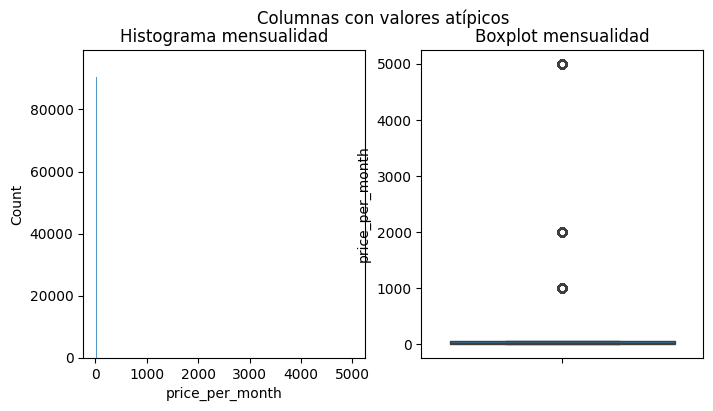

In [ ]:
# Gracias al describe vemos que el maximo de price per month no encaja, así que vamos a hacer un boxplot y un histograma para verlo gráficamente
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Columnas con valores atípicos')

sns.histplot(gym_df['price_per_month'], ax=ax[0])
ax[0].set_title('Histograma mensualidad')

sns.boxplot(gym_df['price_per_month'], ax=ax[1])
ax[1].set_title('Boxplot mensualidad')

In [ ]:
media = gym_df['price_per_month'].mean()
mediana = gym_df['price_per_month'].median()
print(f"La media es {media} y la mediana es {mediana}")
#Podemos ver que el valor erróneo impacta significativamente la media, mientras que la mediana mantiene un valor más correcto

La media es 45.4968881767523 y la mediana es 19.99


In [ ]:
# Observamos cuáles son los valores únicos de price per month
unique_prices = gym_df['price_per_month'].unique()
print("Valores únicos de 'price_per_month':\n", unique_prices)

Valores únicos de 'price_per_month':
 [  49.99   19.99    9.99  999.   4999.   1999.  ]


In [ ]:
# Filtramos los valores de price_per_month para convertir a NaN los outliers 999, 4999 y 1999
import numpy as np
gym_df['price_per_month'] = gym_df['price_per_month'].replace([999, 4999, 1999], np.nan)

<ipython-input-19-26520f281fe0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gym_df['price_per_month'] = gym_df['price_per_month'].replace([999, 4999, 1999], np.nan)


In [ ]:
#Volvemos a iterar como hicimos antes para tratar los valores nulos
# Iteramos sobre cada grupo de 'subscription_plan'
for plan, group in gym_df.groupby('subscription_plan'):
    # Calculamos la mediana de 'price_per_month' para cada grupo
    mediana_precio = group['price_per_month'].median()

    # Asignamos la mediana solo a las filas NaN en 'price_per_month'
    gym_df.loc[(gym_df['subscription_plan'] == plan) & (gym_df['price_per_month'].isnull()), 'price_per_month'] = mediana_precio

# Confirmamos que ya no hay valores nulos
print("Valores nulos price per month:\n", gym_df['price_per_month'].isnull().sum())

Valores nulos price per month:
 0


####Conversión de tipos

In [ ]:
# Observamos que la variable edad y calorias está con el tipo decimal así que lo cambiamos a entero
gym_df['age'] = gym_df['age'].astype(int)
gym_df['calories_burned'] = gym_df['calories_burned'].astype(int)

<ipython-input-21-589fd8c46a7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gym_df['age'] = gym_df['age'].astype(int)
<ipython-input-21-589fd8c46a7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gym_df['calories_burned'] = gym_df['calories_burned'].astype(int)


####Variables de tipo fecha

In [ ]:
# Como queremos cambiar las variables fecha a datetime, deberemos observar primero cuál es su formato
print("Los valores únicos de birthdate son:\n", gym_df['birthdate'].unique())
print("Los valores únicos de sign_up_date son:\n", gym_df['sign_up_date'].unique())
print("Los valores únicos de checkin_time son:\n", gym_df['checkin_time'].unique())
print("Los valores únicos de checkout_time son:\n", gym_df['checkout_time'].unique())

Los valores únicos de birthdate son:
 ['10$03$1998' '28$11$1985' '12$03$1986' ... '26$04$1971' '15$08$1966'
 '02$01$1969']
Los valores únicos de sign_up_date son:
 ['2023-04-08' '2023-07-16' '2021-09-15' ... '2022-11-03' '2021-03-05'
 '2021-10-19']
Los valores únicos de checkin_time son:
 ['2023-09-10 15:55:00' '2023-04-13 20:07:00' '2023-06-10 12:24:00' ...
 '2023-03-14 13:06:00' '2023-04-05 12:21:00' '2023-03-05 06:07:00']
Los valores únicos de checkout_time son:
 ['2023-09-10 16:34:00' '2023-04-13 22:43:00' '2023-06-10 13:49:00' ...
 '2023-08-06 18:09:00' '2023-03-05 07:04:00' '2023-01-05 09:48:00']


In [ ]:
#Viendo el formato de las variables anteriores deberemos sustituir $ por - en birthdate y cambiar su formato, para despues convertir cada una de las variables a datetime
gym_df['birthdate'] = gym_df['birthdate'].str.replace('$', '-')

#Importamos las librerías necesarias y realizamos el cambio de formato
from datetime import datetime
gym_df['birthdate'] = [datetime.strptime(date, "%d-%m-%Y").strftime("%Y-%m-%d") for date in gym_df['birthdate']]
gym_df['checkin_time'] = gym_df['checkin_time'].astype('datetime64[s]')
gym_df['checkout_time'] = gym_df['checkout_time'].astype('datetime64[s]')
gym_df['sign_up_date'] = gym_df['sign_up_date'].astype('datetime64[s]')
gym_df['birthdate'] = gym_df['birthdate'].astype('datetime64[s]')

## Nos hemos fijado que la edad no se corresponde con la fecha de nacimiento así que vamos a sustituir los valores de age en función de birthdate
# Primero, calculamos la edad en base a la fecha actual
from datetime import datetime
today = datetime.today()

gym_df['age'] = gym_df['birthdate'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month,x.day)))

# Comprobamos para el usuario 10 si se ha hecho el cambio de edad correctamente
print(gym_df[gym_df['user_id'] == 'user_10']['age'].head(3))

<ipython-input-23-175a7dca9565>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gym_df['birthdate'] = gym_df['birthdate'].str.replace('$', '-')
<ipython-input-23-175a7dca9565>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gym_df['birthdate'] = [datetime.strptime(date, "%d-%m-%Y").strftime("%Y-%m-%d") for date in gym_df['birthdate']]
<ipython-input-23-175a7dca9565>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

1573    19
1598    19
5170    19
Name: age, dtype: int64


<ipython-input-23-175a7dca9565>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gym_df['age'] = gym_df['birthdate'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month,x.day)))


####Age

In [ ]:
# La edad no se corresponde con la fecha de nacimiento así que vamos a sustituir los valores de age en función de birthdate
# Primero, calculamos la edad en base a la fecha actual con la librería datetime
from datetime import datetime
today = datetime.today()

gym_df['age'] = gym_df['birthdate'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month,x.day)))

# Comprobamos para el usuario 1 si se ha hecho el cambio de edad correctamente
print(gym_df[gym_df['user_id'] == 'user_1']['age'].head(1))

132    24
Name: age, dtype: int64


<ipython-input-24-a205f100e7cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gym_df['age'] = gym_df['birthdate'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month,x.day)))


####Sign up date

In [ ]:
# Hemos observado que existen valores de checkin_time anteriores a sign_up_date.
# Creamos una función que sustituye sign_up_date únicamente si checkin_time es anterior para ese registro.
def fix_signup_date(df):
    # Identificamos las filas con checkin_time < sign_up_date
    mask = df['checkin_time'] < df['sign_up_date']

    # Reemplazamos sign_up_date solo en las filas donde checkin_time es menor
    df.loc[mask, 'sign_up_date'] = df.loc[mask, 'checkin_time']

    return df

# Llamamos a la función para corregir el DataFrame
gym_df = fix_signup_date(gym_df)

###**Transformación de variables**

####**Eliminamos variables irrelevantes**

In [ ]:
# La variable birthdate no nos aporta ninguna información porque en el dataset ya tenemos la variable age
# La variable facilities tampoco nos aporta información relevante porque esta muy correlacionado con el tipo de gimnasio que es, además que ya tenemos la información del tipo de ejercicio que hace el usuario
# Por lo tanto, podemos eliminar ambas variables de nuestro data set
gym_df = gym_df.drop(['birthdate', 'facilities'], axis=1)

####**Variables categóricas**

In [ ]:
# Seleccionamos las columnas categóricas
categorical_cols = gym_df.select_dtypes(include='object').columns

# Analizamos cada columna categórica
for col in categorical_cols:
    print(f"\n--- Análisis de la columna: {col} ---")

    # Obtenemos y mostramos los valores únicos
    unique_values = gym_df[col].unique()
    print(f"Valores únicos ({len(unique_values)}): {unique_values}")


--- Análisis de la columna: user_id ---
Valores únicos (4692): ['user_3291' 'user_1944' 'user_958' ... 'user_295' 'user_4233' 'user_3522']

--- Análisis de la columna: gym_id ---
Valores únicos (10): ['gym_6' 'gym_2' 'gym_7' 'gym_10' 'gym_5' 'gym_8' 'gym_1' 'gym_4' 'gym_3'
 'gym_9']

--- Análisis de la columna: workout_type ---
Valores únicos (18): ['Weightlifting' 'Yoga' 'Cardio' 'CrossFit' 'Swimming' 'Pilates' 'yoga'
 'pilates' 'cardio' 'WEIGHTLIFTING' 'PILATES' 'SWIMMING' 'swimming'
 'CARDIO' 'YOGA' 'weightlifting' 'CROSSFIT' 'crossfit']

--- Análisis de la columna: location ---
Valores únicos (10): ['Philadelphia' 'Los Angeles' 'San Antonio' 'San Jose' 'Phoenix'
 'San Diego' 'New York' 'Houston' 'Chicago' 'Dallas']

--- Análisis de la columna: gym_type ---
Valores únicos (6): ['Budget' 'Premium' 'Standard' 'ECONOMICO' 'MUY CARO!' 'NORMALILLO']

--- Análisis de la columna: first_name ---
Valores únicos (12): ['Michael' 'Emily' 'David' 'Laura' 'John' 'Chris' 'Jessica' 'Robert'
 'Sar

In [ ]:
# Homogeneizamos los valores de las variables categóricas

# Convertimos a minuscula los valores de workout_type
gym_df['workout_type'] = gym_df['workout_type'].str.lower()

# Simplificamos los valores de la variable gym_type
gym_df['gym_type'] = gym_df['gym_type'].replace({
      'ECONOMICO': 'Budget',
      'MUY CARO!': 'Premium',
      'NORMALILLO': 'Standard'
})

# Simplificamos la variable gender
gym_df['gender'] = gym_df['gender'].replace({
      'M': 'Male',
      'F': 'Female',
      'N': 'Non-binary'
})

# Convertimos los registros de subscription plan a minúsculas)
gym_df['subscription_plan'] = gym_df['subscription_plan'].str.lower()

####**Creación de variables**

In [ ]:
#Para obtener visualizaciones de tendencias estacionales necesitaremos crear nuevas variables
#como por ejemplo, el mes del check-in

# Creamos la variable 'checkin_month' a partir del mes del checkin
gym_df['checkin_month'] = gym_df['checkin_time'].dt.month

# Creamos la variable sign_up_month a partir del mes de la fecha de registro
gym_df['sign_up_month'] = gym_df['sign_up_date'].dt.month

## **4. Codificación variables categorías**

###**Datos binarios y nominales**

In [ ]:
# Codificamos las variables binarias y nominales (workout_type y location) con One-Hot Encoding
cat_gym_df = pd.get_dummies(gym_df,
                            columns=['gender', 'workout_type', 'location', 'user_location'],
                            prefix=['Gender', 'WorkoutType', 'Location', 'UserLocation']
                            )
print(cat_gym_df.columns)

Index(['user_id', 'gym_id', 'checkin_time', 'checkout_time', 'calories_burned',
       'gym_type', 'first_name', 'last_name', 'age', 'sign_up_date',
       'subscription_plan', 'price_per_month', 'features', 'checkin_month',
       'sign_up_month', 'Gender_Female', 'Gender_Male', 'Gender_Non-binary',
       'WorkoutType_cardio', 'WorkoutType_crossfit', 'WorkoutType_pilates',
       'WorkoutType_swimming', 'WorkoutType_weightlifting', 'WorkoutType_yoga',
       'Location_Chicago', 'Location_Dallas', 'Location_Houston',
       'Location_Los Angeles', 'Location_New York', 'Location_Philadelphia',
       'Location_Phoenix', 'Location_San Antonio', 'Location_San Diego',
       'Location_San Jose', 'UserLocation_Atlanta', 'UserLocation_Austin',
       'UserLocation_Boston', 'UserLocation_Denver', 'UserLocation_Detroit',
       'UserLocation_Las Vegas', 'UserLocation_Miami', 'UserLocation_Orlando',
       'UserLocation_San Francisco', 'UserLocation_Seattle'],
      dtype='object')


###**Datos ordinales**

In [ ]:
# Codificamos las variables ordinales manualmente porque con LabelEncoder no podemos escoger el orden
# Por lo tanto, crearemos una lista con el orden que queremos y después con una iteración asginaremos
# el valor según la posición del elemento en la lista

# Codificamos gym_type
gym_type_orden = ['Budget', 'Standard', 'Premium']
gym_df['gym_prestige'] = 0
for i, elem in enumerate(gym_type_orden):
    gym_df.loc[gym_df['gym_type'] == elem, 'gym_prestige'] = i

# Codificamos subscription_plan
subscription_plan_orden = ['basic', 'student', 'pro']
gym_df['subscription_tier'] = 0
for i, elem in enumerate(subscription_plan_orden):
    gym_df.loc[gym_df['subscription_plan'] == elem, 'subscription_tier'] = i

# Codificamos features
features_orden = [
    'Access to basic gym facilities, Limited class access, 1 guest pass per month',
    'Access to basic facilities, Limited class access, 1 guest pass per month, Discounted for students',
    'Access to all facilities, Unlimited class access, 5 guest passes per month, Free personal trainer session'
]
gym_df['access_level'] = 0
for i, elem in enumerate(features_orden):
    gym_df.loc[gym_df['features'] == elem, 'access_level'] = i

# Mostramos las columnas codificadas para verificar
print(gym_df[['gym_type', 'gym_prestige']].head())
print(gym_df[['subscription_plan', 'subscription_tier']].head())
print(gym_df[['features', 'access_level']].head())


  gym_type  gym_prestige
0   Budget             0
1   Budget             0
2  Premium             2
3   Budget             0
4  Premium             2
  subscription_plan  subscription_tier
0               pro                  2
1               pro                  2
2             basic                  0
3           student                  1
4               pro                  2
                                            features  access_level
0  Access to all facilities, Unlimited class acce...             2
1  Access to all facilities, Unlimited class acce...             2
2  Access to basic gym facilities, Limited class ...             0
3  Access to basic facilities, Limited class acce...             1
4  Access to all facilities, Unlimited class acce...             2


In [ ]:
# Juntamos todos las nuevas columnas en el dataframe

# Variables binarias codificadas
col_binarias = ['Gender_Female', 'Gender_Male', 'Gender_Non-binary']

# Variables nominales codificadas (One-Hot Encoding)
col_nominales = cat_gym_df.filter(like='WorkoutType').columns.tolist() + cat_gym_df.filter(like='Location').columns.tolist() + cat_gym_df.filter(like='UserLocation').columns.tolist()

# Concatenamos el dataset original con las columnas codificadas
new_gym_df = pd.concat([gym_df, cat_gym_df[col_binarias + col_nominales]], axis=1)

#Eliminamos las variables categóricas originales que hemos transformado a numéricas
categoricas_originales = ['gym_type', 'workout_type', 'gender', 'user_location', 'location', 'subscription_plan', 'features']
new_gym_df = new_gym_df.drop(columns=categoricas_originales)
# Mostramos las columnas del nuevo dataset
print('Las columnas del nuevo df son: ', new_gym_df.columns)

Las columnas del nuevo df son:  Index(['user_id', 'gym_id', 'checkin_time', 'checkout_time', 'calories_burned',
       'first_name', 'last_name', 'age', 'sign_up_date', 'price_per_month',
       'checkin_month', 'sign_up_month', 'gym_prestige', 'subscription_tier',
       'access_level', 'Gender_Female', 'Gender_Male', 'Gender_Non-binary',
       'WorkoutType_cardio', 'WorkoutType_crossfit', 'WorkoutType_pilates',
       'WorkoutType_swimming', 'WorkoutType_weightlifting', 'WorkoutType_yoga',
       'Location_Chicago', 'Location_Dallas', 'Location_Houston',
       'Location_Los Angeles', 'Location_New York', 'Location_Philadelphia',
       'Location_Phoenix', 'Location_San Antonio', 'Location_San Diego',
       'Location_San Jose', 'UserLocation_Atlanta', 'UserLocation_Austin',
       'UserLocation_Boston', 'UserLocation_Denver', 'UserLocation_Detroit',
       'UserLocation_Las Vegas', 'UserLocation_Miami', 'UserLocation_Orlando',
       'UserLocation_San Francisco', 'UserLocation_Seat

##**5.Relacions y correlaciones entre variables**

###**Matriz de correlación**

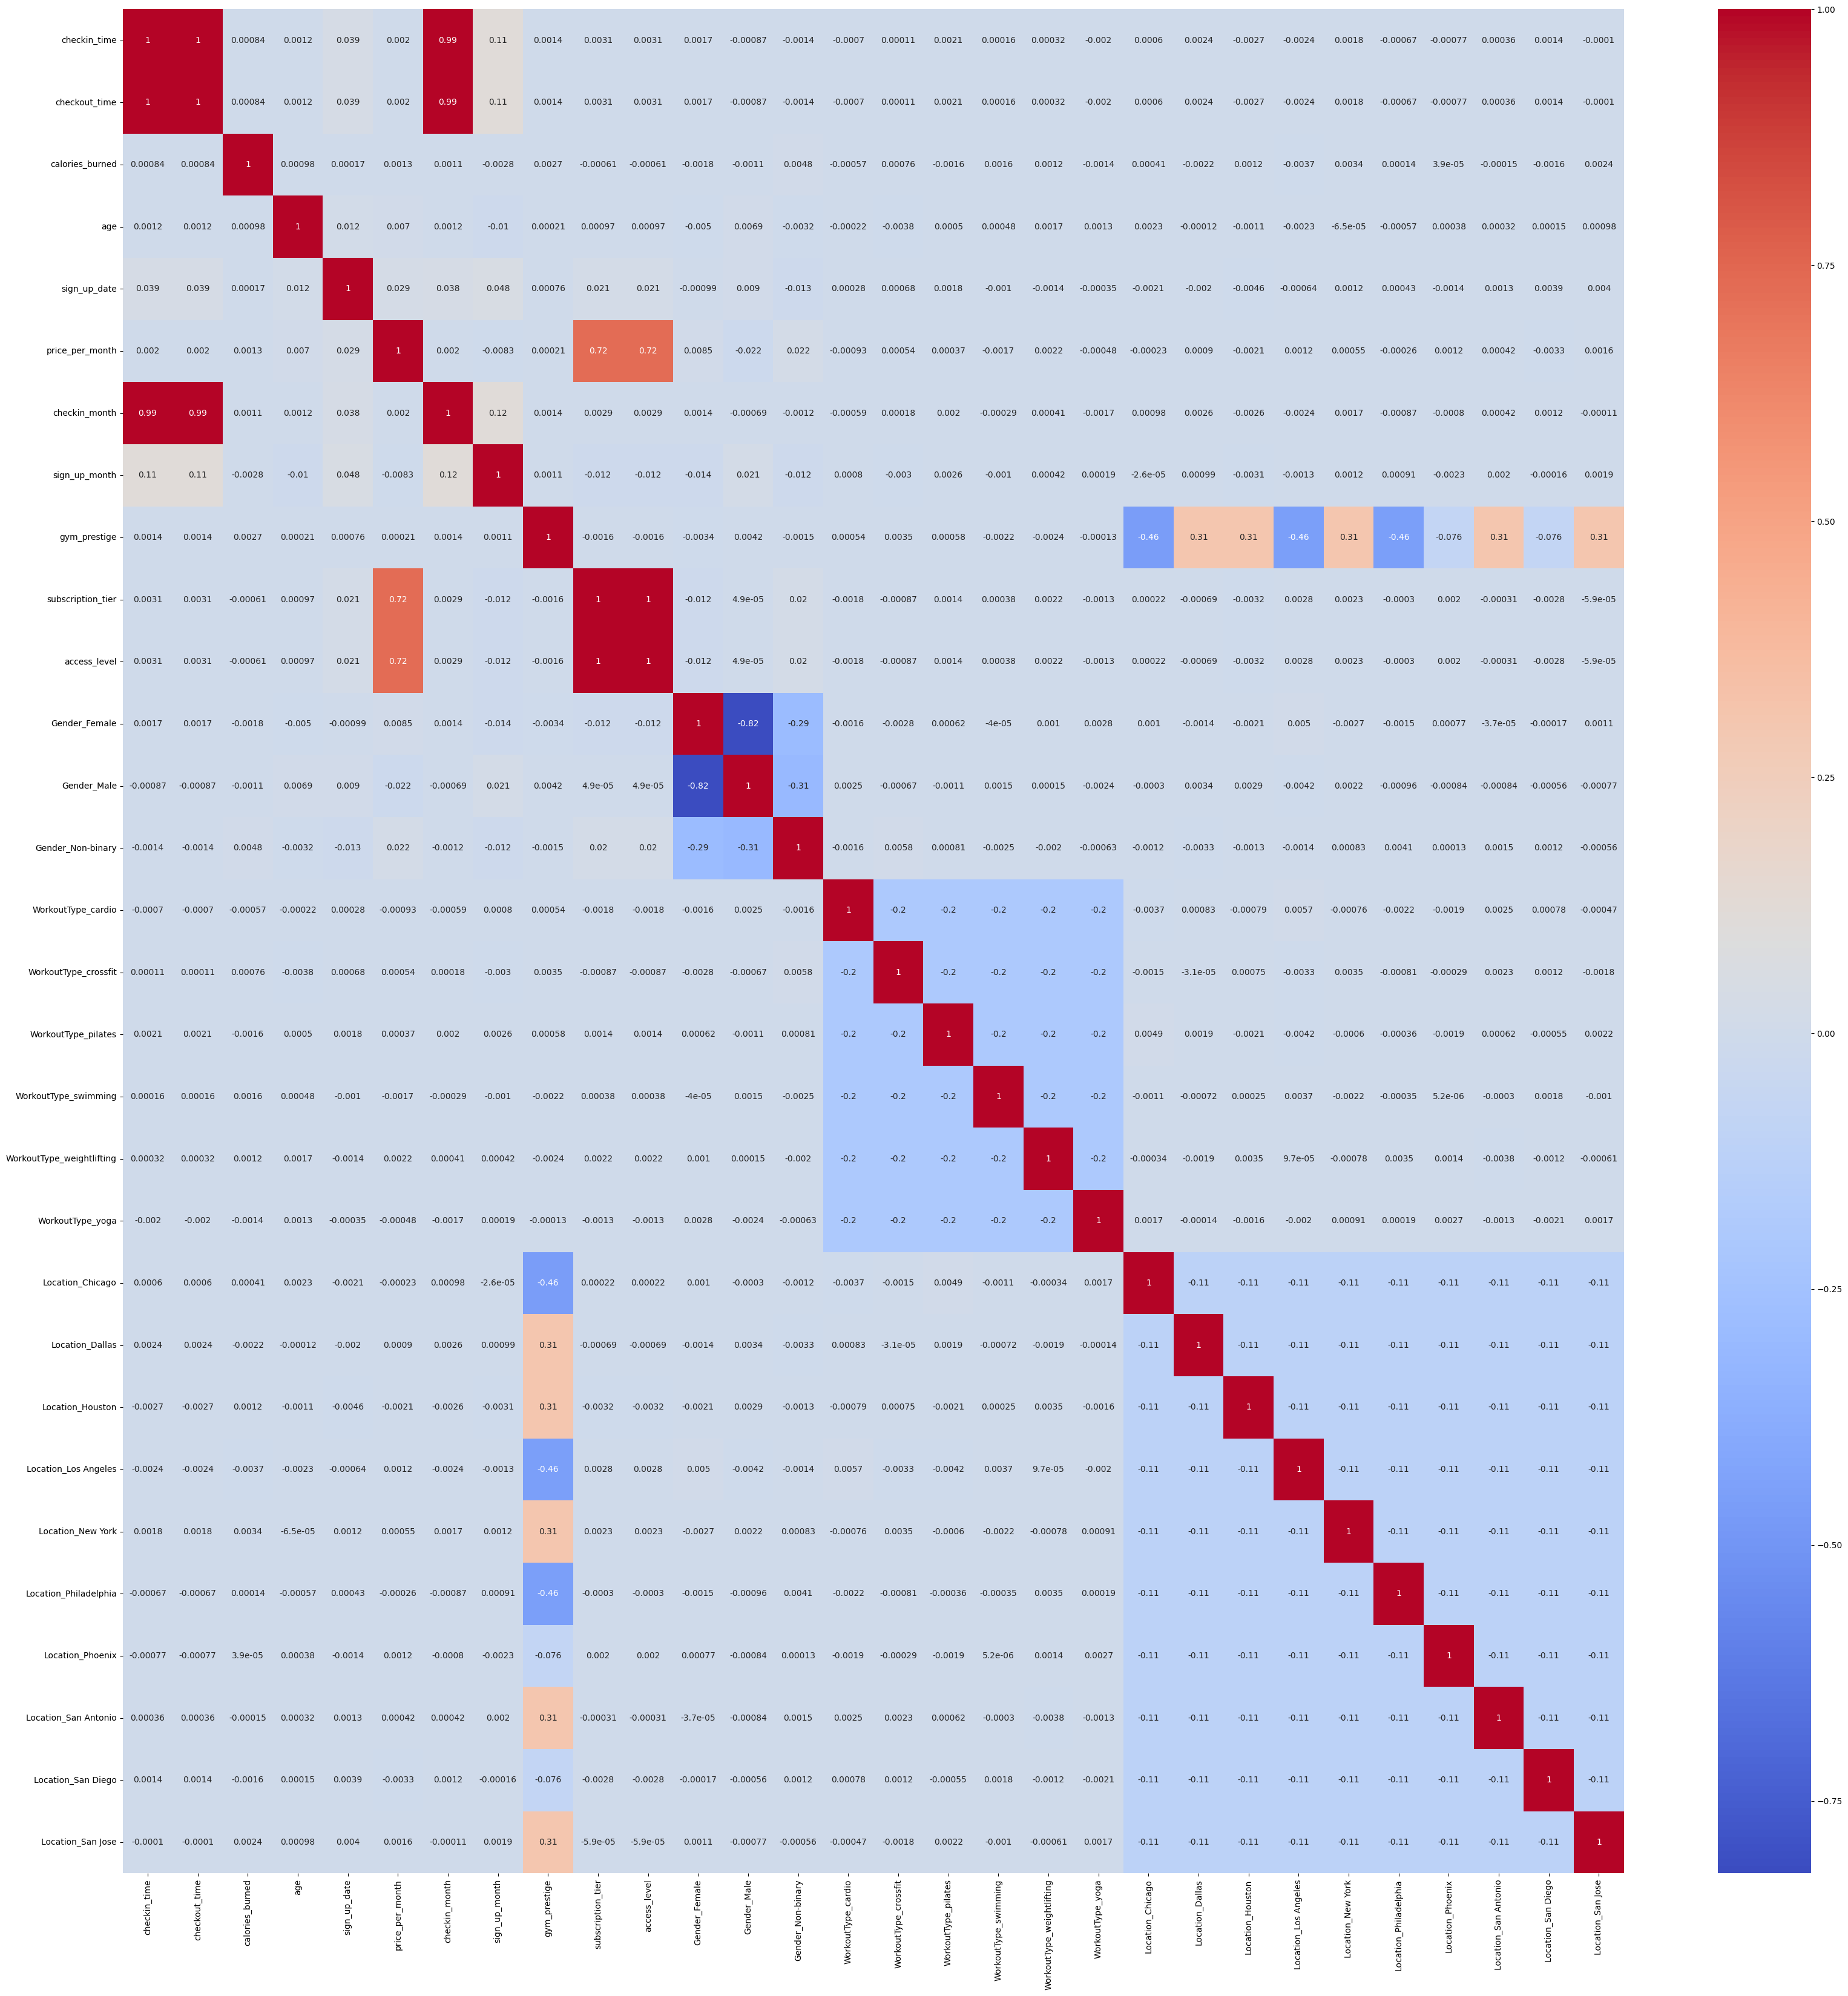

In [ ]:
# Cargamos las librerías necesarias
import seaborn as sns
import matplotlib.pyplot as plt

# Nos quedamos con las columnas numéricas
numeric_cols = list(new_gym_df.describe().columns)

#Nos quedamos con las columnas de booleanos sin tener en cuenta las de localización de los usuarios
bool_cols = ['Gender_Female', 'Gender_Male', 'Gender_Non-binary', 'WorkoutType_cardio', 'WorkoutType_crossfit',
             'WorkoutType_pilates', 'WorkoutType_swimming', 'WorkoutType_weightlifting', 'WorkoutType_yoga',
             'Location_Chicago', 'Location_Dallas', 'Location_Houston',
             'Location_Los Angeles', 'Location_New York', 'Location_Philadelphia',
             'Location_Phoenix', 'Location_San Antonio', 'Location_San Diego',
             'Location_San Jose'
]

new_gym_df[bool_cols] = new_gym_df[bool_cols].astype(int)

# Filtramos por esas columnas
gym_num = new_gym_df[numeric_cols+bool_cols]


# Calculamos la matriz de correlación
correlation_matrix = gym_num.corr()

# Hacemos el gráfico con heatmap
plt.figure(figsize = (40,40))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

Analizando la matriz de correlaciones destacamos variables con una elevada correlación positiva, y luego observamos correlaciones negativas y positivas significativas pero no tan altas.

Con respecto a las variables con elevada correlación positiva, tenemos checkin_time y checkin_month, lo cual era de esperar porque una se deriva de la otra; tambien observamos una correlación de 0,72 de price per month con access level y subscription tier, esto tiene sentido ya que las tarifas más altas se corresponden con mayores niveles de servicios.

En el segundo bloque tenemos las correlaciones negativas. Por un lado, hay una elevada correlación negativa entre el género masculino y femenino, lo cual es habitual en variables binarias como el género porque son excluyentes. Por otro lado, tenemos que gym prestige se relaciona negativamente con ciudades como Philadelphia cosa que, se traduce en que en estas ciudades se tienden a concentrar gimansios de menor prestigio.

Por último, en cuanto a las correlaciones positivas, de nuevo, tenemos a gym prestige pero esta vez indica que ciudades como New York tiende a tener gimnasios más prestigiosos. Este fenómeno se puede interpretar como que las ciudades con mayor nivel de rentas tienden a preferir servicios premium, lo cual nos da pistas sobre qué tipo de gimnasio es más ideal abrir en una ciudad u otra.

###**VIF**

In [ ]:
# Importamos las librerías necesarias
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Excluímos las variables datetime para el análisis de VIF
VIF_cols = gym_num.select_dtypes(include=['int64', 'float64', 'int32']).columns

# Creamos un DataFrame de las variables numéricas seleccionadas
X = add_constant(gym_num[VIF_cols])

# Creamos un DataFrame para almacenar los resultados de VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostramos el DataFrame resultante
print("\n--- Resultados de VIF ---\n", vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



--- Resultados de VIF ---
                      Variable       VIF
0                       const  0.000000
1             calories_burned  1.000085
2                         age  1.000282
3             price_per_month  2.097805
4               checkin_month  1.013521
5               sign_up_month  1.014261
6                gym_prestige       inf
7           subscription_tier       inf
8                access_level       inf
9               Gender_Female       inf
10                Gender_Male       inf
11          Gender_Non-binary       inf
12         WorkoutType_cardio       inf
13       WorkoutType_crossfit       inf
14        WorkoutType_pilates       inf
15       WorkoutType_swimming       inf
16  WorkoutType_weightlifting       inf
17           WorkoutType_yoga       inf
18           Location_Chicago       inf
19            Location_Dallas       inf
20           Location_Houston       inf
21       Location_Los Angeles       inf
22          Location_New York       inf
23      Loca

In [ ]:
# Volvemos a realizar el VIF excluyendo aquellas variables que nos crean multicolinealidad
list_to_exclude = ['Gender_Non-binary', 'WorkoutType_yoga', 'subscription_tier', 'access_level', 'gym_prestige', 'Location_Chicago']

# Excluímos las variables datetime para el análisis de VIF
VIF_cols = gym_num.select_dtypes(include=['int64', 'float64', 'int32']).columns
VIF_cols = [col for col in VIF_cols if col not in list_to_exclude]

# Creamos un DataFrame de las variables numéricas seleccionadas
X = add_constant(gym_num[VIF_cols])

# Creamos un DataFrame para almacenar los resultados de VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostramos el DataFrame resultante
print("\n--- Resultados de VIF ---\n", vif_data)


--- Resultados de VIF ---
                      Variable        VIF
0                       const  45.853440
1             calories_burned   1.000079
2                         age   1.000244
3             price_per_month   1.000885
4               checkin_month   1.013510
5               sign_up_month   1.014175
6               Gender_Female   3.065614
7                 Gender_Male   3.067635
8          WorkoutType_cardio   1.664044
9        WorkoutType_crossfit   1.669431
10        WorkoutType_pilates   1.668263
11       WorkoutType_swimming   1.669349
12  WorkoutType_weightlifting   1.670379
13            Location_Dallas   1.788077
14           Location_Houston   1.795405
15       Location_Los Angeles   1.785810
16          Location_New York   1.789426
17      Location_Philadelphia   1.788315
18           Location_Phoenix   1.793268
19       Location_San Antonio   1.788373
20         Location_San Diego   1.786992
21          Location_San Jose   1.787582


El análisis VIF muestra que no existen problemas significativos de multicolinealidad en el data set porque las variables tienen valores de VIF bajos, lo cual indica independencia entre las variables.

## **6. Visualización del data set**

### Pregunta 1 - ¿Cuál es el tiempo medio de entreno?

In [ ]:
# Para responder esta pregunta tenemos que hacer la diferencia entre el check in y el check out.
gym_df['train_time'] = (gym_df['checkout_time'] -  gym_df['checkin_time'])
# Lo vemos en horas para que quede mas clara la información
gym_df['train_time_hours'] = gym_df['train_time'].dt.total_seconds() / 3600
gym_df.describe()
# Con el describe descartamos problemas de datos y vemos que los numeros son valores logicos.

,checkin_time,checkout_time,calories_burned,age,sign_up_date,price_per_month,checkin_month,sign_up_month,gym_prestige,subscription_tier,access_level,train_time,train_time_hours
count,280845,280845,280845.000000,280845.000000,280845,280845.00000,280845.000000,280845.000000,280845.000000,280845.000000,280845.000000,280845,280845.000000
mean,2023-05-24 21:59:12,2023-05-24 23:43:44,885.767719,41.952401,2022-05-10 13:50:57,26.79037,5.272179,5.625391,1.199544,1.014688,1.014688,0 days 01:44:32,1.742294
min,2023-01-01 06:00:00,2023-01-01 06:45:00,150.000000,18.000000,2021-01-01 00:00:00,9.99000,1.000000,1.000000,0.000000,0.000000,0.000000,0 days 00:30:00,0.500000
25%,2023-03-14 08:21:00,2023-03-14 09:55:00,534.000000,30.000000,2021-09-12 00:00:00,9.99000,3.000000,3.000000,0.000000,0.000000,0.000000,0 days 01:07:00,1.116667
50%,2023-05-24 17:04:00,2023-05-24 18:44:00,834.000000,41.000000,2022-05-30 00:00:00,19.99000,5.000000,5.000000,1.000000,1.000000,1.000000,0 days 01:45:00,1.750000
75%,2023-08-04 14:17:00,2023-08-04 15:54:00,1179.000000,54.000000,2023-01-22 00:00:00,49.99000,8.000000,8.000000,2.000000,2.000000,2.000000,0 days 02:22:00,2.366667
max,2023-10-15 20:59:00,2023-10-15 23:43:00,2147.000000,66.000000,2023-10-15 00:00:00,49.99000,10.000000,12.000000,2.000000,2.000000,2.000000,0 days 02:59:00,2.983333
std,NaN,NaN,432.557321,13.881812,NaN,17.10223,2.741854,3.366925,0.871880,0.814241,0.814241,0 days 00:43:12,0.720139


<Axes: xlabel='workout_type', ylabel='train_time_hours'>

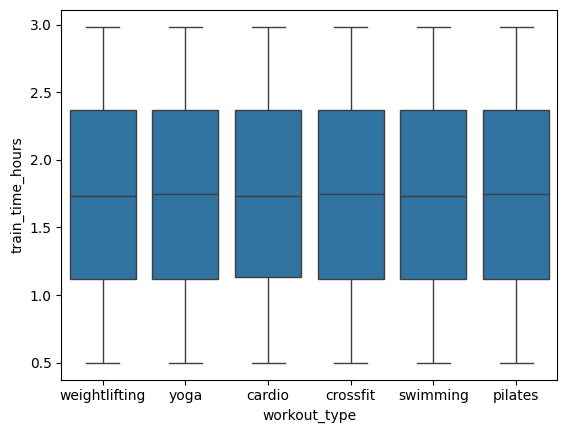

In [ ]:
# Ahora podemos pasar a ver el tiempo medio de entro y ademas hacer analisis un poco mas profundos de datos.
# Revisamos el valor medio de entreno
gym_df['train_time_hours'].mean()
sns.boxplot(data= gym_df, x="workout_type", y="train_time_hours", showfliers = False)
# Generamos un boxplot que nos de una idea de la media y vemos que se comporta todo muy similar todos los entrenamientos.
# Partiendo de esa base, vamos a ver si la edad determina algo en esta media o es una variable que no afecta

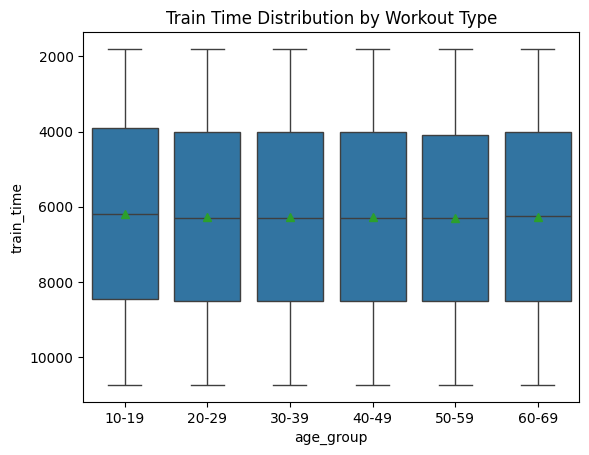

In [ ]:
# Para eso vamos a hacer grupos etarios por cada 10 años
# Crear los grupos etarios de 10 años
gym_df['age_group'] = pd.cut(
    gym_df['age'],
    bins=range(10, 71, 10),  # Rango desde 0 hasta 70, con pasos de 10 años
    right=False,
    labels=[f'{i}-{i+9}' for i in range(10, 70, 10)]  # Etiquetas para los grupos
)
sns.boxplot(data=gym_df, x="age_group", y="train_time", showmeans=True)
plt.title("Train Time Distribution by Workout Type")
plt.show()
# Podemos ver que existe una varianza pero que es minima.

### Pregunta 2 - Frecuencia actividad física

In [ ]:
#Importamos las librerías necesarias
import matplotlib.pyplot as plt
from ipywidgets import widgets, VBox, interactive_output

def calcular_tasa_abandono_total(gym_df, low_activity_threshold=3, period_days=365):
    # Fijamos la última fecha permitida para considerar actividad
    gym_df['last_allowed_date'] = pd.Timestamp('2023-12-31')

    # Filtramos check-ins que ocurren dentro del período definido
    active_checkins = gym_df[gym_df['checkin_time'] <= gym_df['last_allowed_date']]

    # Contamos el número de check-ins por usuario dentro del período
    checkin_counts = active_checkins.groupby('user_id')['checkin_time'].count()

    # Identificamos usuarios con baja frecuencia de actividad
    low_activity_users = checkin_counts[checkin_counts < low_activity_threshold]

    # Número de usuarios con baja frecuencia
    num_low_activity_users = len(low_activity_users)

    # Total de usuarios únicos
    total_users = gym_df['user_id'].nunique()

    # Tasa de usuarios con baja frecuencia de actividad
    low_activity_rate = (num_low_activity_users / total_users) * 100

    # Visualización de la baja frecuencia
    plt.figure(figsize=(6, 6))
    labels = ['Usuarios con Actividad Frecuente', 'Usuarios con Baja Frecuencia']
    sizes = [total_users - num_low_activity_users, num_low_activity_users]
    colors = ['#4CAF50', '#FF5733']
    explode = (0, 0.1)  # Destacamos el segundo segmento

    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors)
    plt.title(f'Tasa de frecuencia\n(menos de {low_activity_threshold} check-ins en {period_days} días)')
    plt.show()

    return low_activity_rate

# Creamos los widgets
low_activity_widget = widgets.IntSlider(value=50, min=1, max=100, step=1, description="Inactividad:")
period_days_widget = widgets.IntSlider(value=365, min=30, max=365, step=30, description="Días:")

# Función para conectar los widgets
def actualizar_grafico(low_activity_threshold, period_days):
    calcular_tasa_abandono_total(gym_df, low_activity_threshold, period_days)

# Creamos la interacción
output = interactive_output(actualizar_grafico, {'low_activity_threshold': low_activity_widget,
                                                 'period_days': period_days_widget})

# Mostramos los widgets
display(VBox([low_activity_widget, period_days_widget, output]))

El gráfico muestra la tasa de frecuencia de uso de los gimnasios, representando el porcentaje de usuarios que realizaron menos de un umbral específico de check-ins en un período determinado. La gráfica utiliza un gráfico de pastel dividido en dos secciones: una porción roja para los usuarios de baja frecuencia y una porción verde para los usuarios con actividad frecuente. Los controles deslizantes y el selector en la parte superior permiten ajustar dinámicamente los parámetros del análisis, como el período de días y la cantidad mínima de check-ins considerados como baja actividad. Este tipo de visualización es útil para identificar y cuantificar la retención y el compromiso de los usuarios.

### Pregunta 3 - Cantidad de calorías quemadas varia según la edad/qué actividades están más asociadas con quema de calorías, depende la quema de calorías de las estaciones del año?

In [ ]:
# Para esta pregunta vamos a trabajar con la columna de calories_burned
# El primer paso va a ir tambien con el grupo etario, varia la cantidad de calorias por edad?
# Agrupar por grupos etarios, tipo de ejercicio y calcular el promedio de calorías quemadas
calories_burned_age = gym_df.groupby('age_group')['calories_burned'].mean().reset_index()
calories_burned_age

<ipython-input-40-d8419844da6c>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calories_burned_age = gym_df.groupby('age_group')['calories_burned'].mean().reset_index()


,age_group,calories_burned
0,10-19,881.010717
1,20-29,884.227802
2,30-39,887.387765
3,40-49,884.933130
4,50-59,886.647244
5,60-69,886.267657


<ipython-input-41-b95d1df6025a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=calories_burned_age, x='age_group', y='calories_burned', ci=None)


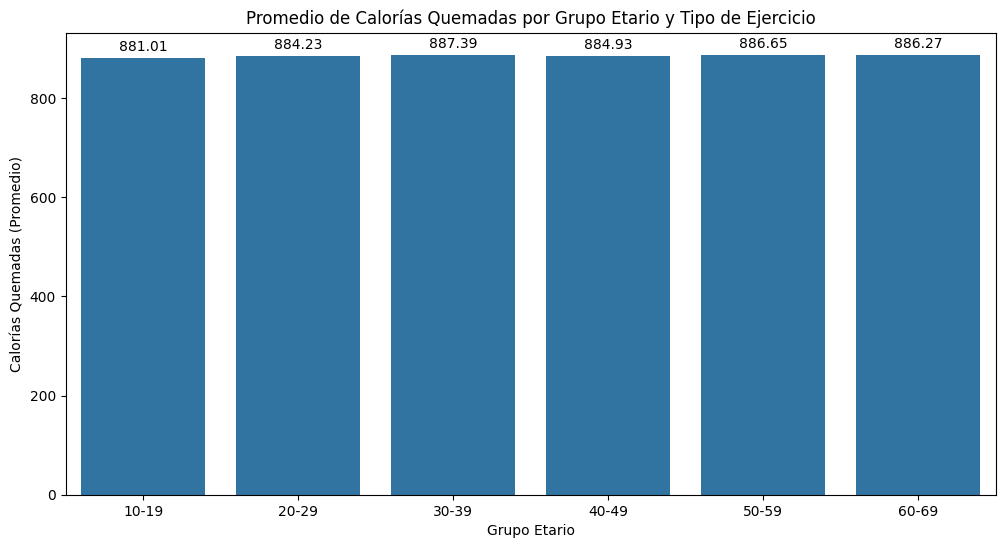

In [ ]:
# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=calories_burned_age, x='age_group', y='calories_burned', ci=None)

# Agregamos los valores encima de cada barra
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 8),
        textcoords='offset points'
    )

# Damos el detalle que queremos al grafico
plt.title('Promedio de Calorías Quemadas por Grupo Etario y Tipo de Ejercicio')
plt.xlabel('Grupo Etario')
plt.ylabel('Calorías Quemadas (Promedio)')
plt.show()

# La respuesta de este grafico denota varianza casi nula entre este tipo de variables.


In [ ]:
# Vamos a repetir la accion pero en este caso por tipo de workout
# Para seguir viendo si es algo propio del data set o es información correcta
calories_burned_workout = gym_df.groupby('workout_type')['calories_burned'].mean().reset_index()
calories_burned_workout

,workout_type,calories_burned
0,cardio,885.212132
1,crossfit,886.498359
2,pilates,884.242338
3,swimming,887.305337
4,weightlifting,886.907082
5,yoga,884.424010


<ipython-input-43-3fb56f2daac0>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=calories_burned_workout, x='workout_type', y='calories_burned', ci=None)


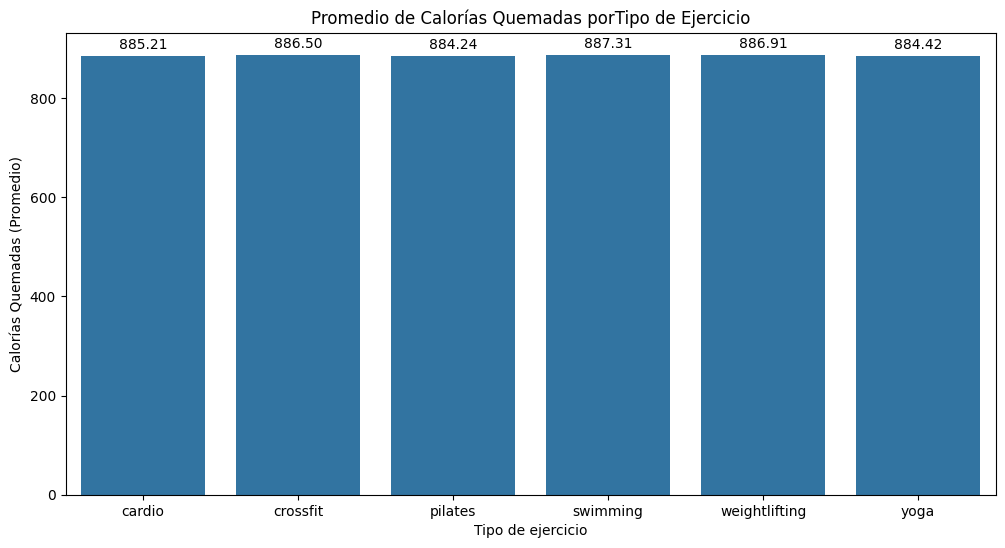

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=calories_burned_workout, x='workout_type', y='calories_burned', ci=None)
# Ponemos los valores sobre las columnas para poder hacer un mejor analisis
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 8),
        textcoords='offset points'
    )
# Damos forma que queremos al grafico
plt.title('Promedio de Calorías Quemadas porTipo de Ejercicio')
plt.xlabel('Tipo de ejercicio')
plt.ylabel('Calorías Quemadas (Promedio)')
plt.show()

# Al repetir los pasos y ver resultados similares entendemos que no existe tal varianza entre calories burned.

El mapa muestra una distribución clara de usuarios en ciudades clave de Estados Unidos, con mayor concentración en la costa este y algunas zonas del sur y oeste, como Miami, Los Ángeles y San Francisco. Los gimnasios, representados por los íconos rojos, están estratégicamente ubicados en ciudades con alta densidad poblacional, como Nueva York, Los Ángeles y Dallas, aunque no coinciden directamente con todas las ciudades donde hay usuarios, como Seattle o Denver. Esto sugiere oportunidades para expandir la presencia de gimnasios en áreas con una base de usuarios significativa pero sin infraestructura existente, maximizando así la cobertura y satisfacción de los usuarios.

### Pregunta 4 - Análisis de series temporales


####4.1 Registros mensuales histórico

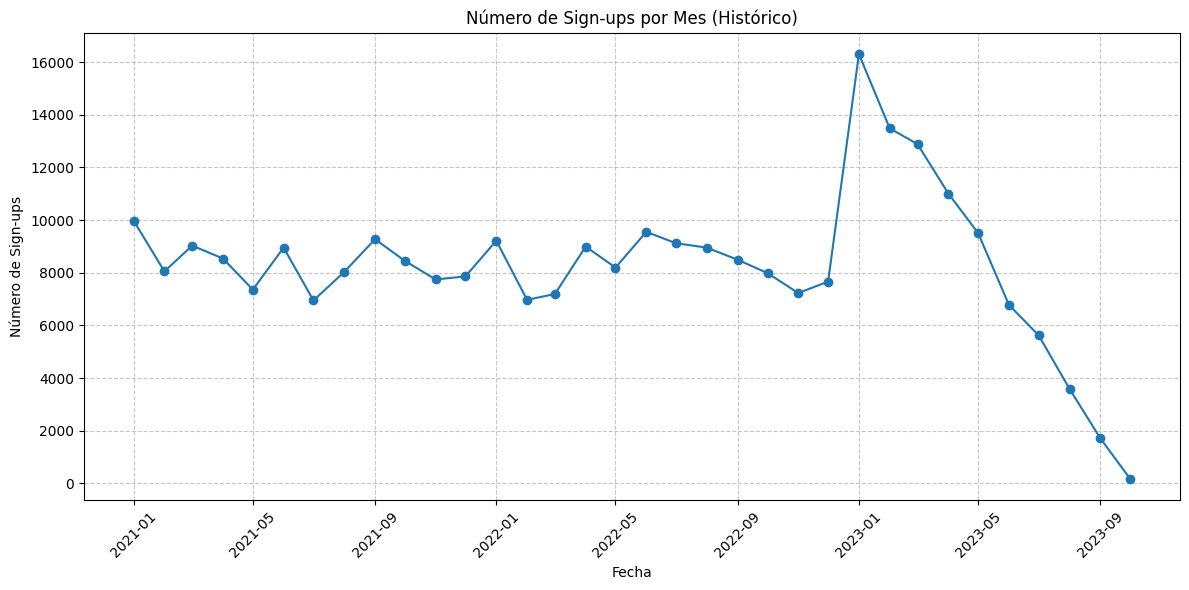

In [ ]:
# Crear columna de año a partir de sign_up_date
gym_df['sign_up_year'] = gym_df['sign_up_date'].dt.year

# Agrupamos por año y mes, y contamos los sign-ups
signups_historicos = gym_df.groupby(['sign_up_year', 'sign_up_month']).size().reset_index(name='signups')

# Creamos una columna de fecha para facilitar la visualización
signups_historicos['date'] = pd.to_datetime({
    'year': signups_historicos['sign_up_year'],
    'month': signups_historicos['sign_up_month'],
    'day': 1
})

# Gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(signups_historicos['date'], signups_historicos['signups'], marker='o', linestyle='-')

# Etiquetas y título
plt.title('Número de Sign-ups por Mes (Histórico)')
plt.xlabel('Fecha')
plt.ylabel('Número de Sign-ups')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico

# Mostrar el gráfico
plt.show()

Observando el gráfico destacamos que en 2023 hay un pico muy significativo de altas. Esto se debe, probablemente, al hecho que las fechas de check-in del data set datan unicamente de 2023, mientras que los sign up tenemos datos desde 2021; y este fenómeno unido a la corrección que aplicamos en aquellos check-in que tenían fechas anteriores al sign up del usuario ha podido desembocar en que la corrección de los sign up se haya visto muy influenciada por el hecho que enero suele ser el mes que más check-in se realizan a lo largo de un año como veremos en la visualización del apartado 4.2

Por este motivo, el siguiente análisis temporal de registros mensuales histórico no tendrá en cuenta el año 2023.

#### 4.2 Sign up mensuales histórico (sin 2023)

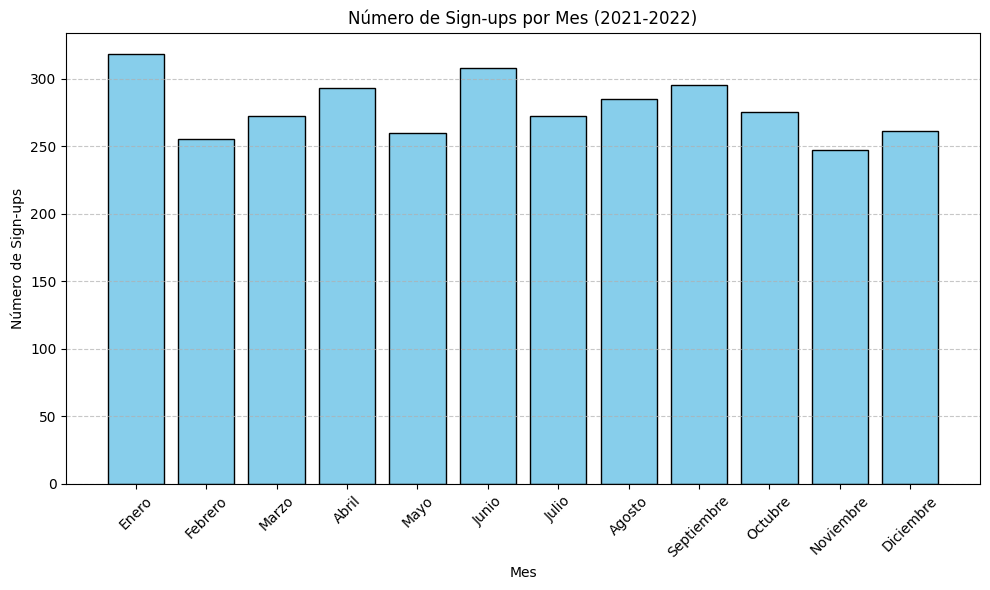

In [ ]:
# Filtramos los datos solo para 2021 y 2022
gym_df_filtered = gym_df[(gym_df['sign_up_date'].dt.year == 2021) |
                         (gym_df['sign_up_date'].dt.year == 2022)]

# Agrupamos por mes y contamos el número de sign-ups
signups_por_mes = gym_df_filtered.groupby('sign_up_month')['user_id'].nunique().reset_index()

# Reemplazamos el número del mes por el nombre del mes
meses_nombre = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
                "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
signups_por_mes['month_name'] = signups_por_mes['sign_up_month'].apply(lambda x: meses_nombre[x-1])

# Ordenamos los datos por el número del mes
signups_por_mes = signups_por_mes.sort_values(by='sign_up_month')

# Gráfico de barras (histograma)
plt.figure(figsize=(10, 6))
bars = plt.bar(signups_por_mes['month_name'], signups_por_mes['user_id'],
               color='skyblue', edgecolor='black')

# Etiquetas y título
plt.title("Número de Sign-ups por Mes (2021-2022)")
plt.xlabel("Mes")
plt.ylabel("Número de Sign-ups")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###4.2 Check-ins mensuales (sin 2023)

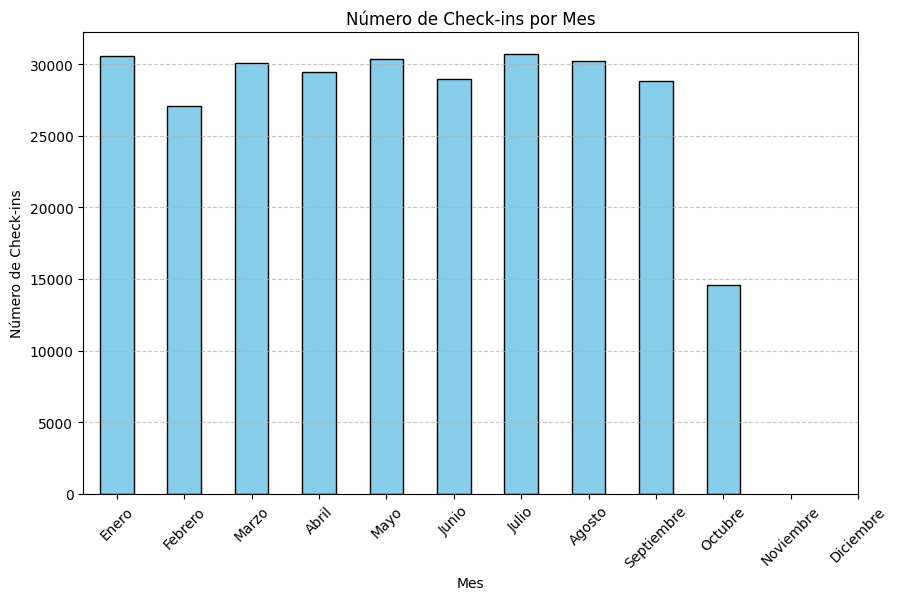

In [ ]:
#Agrupamod y contamos el número de check-ins por mes
checkins_by_month = gym_df['checkin_month'].value_counts().sort_index()

# Creamos gráfico de barras
plt.figure(figsize=(10, 6))
checkins_by_month.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Número de Check-ins por Mes")
plt.xlabel("Mes")
plt.ylabel("Número de Check-ins")
plt.xticks(ticks=range(0, 12), labels=[
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

####4.3 Check-ins por estaciones del año

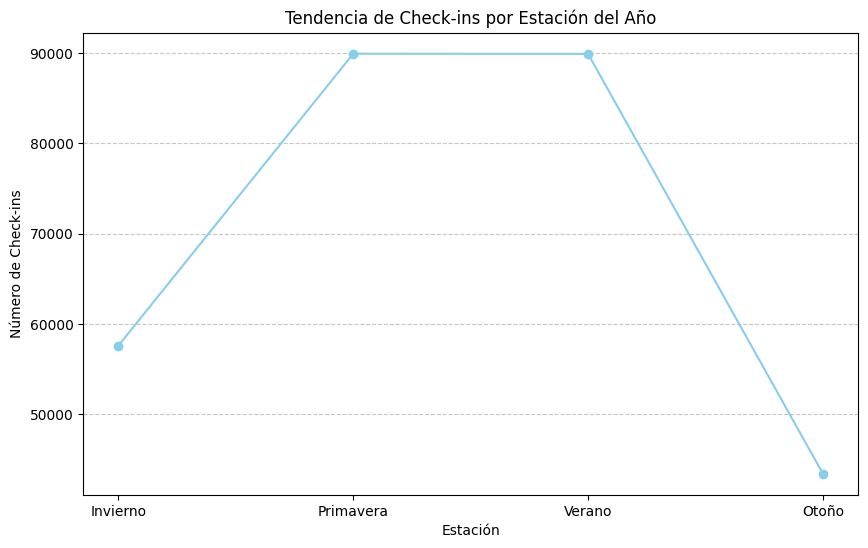

In [ ]:
# Creamos una función para asignar las estaciones del año
def obtener_estacion(fecha):
    mes = fecha.month
    if mes in [12, 1, 2]:
        return 'Invierno'
    elif mes in [3, 4, 5]:
        return 'Primavera'
    elif mes in [6, 7, 8]:
        return 'Verano'
    else:
        return 'Otoño'

# Aplicamos la función para obtener la estación de check-ins
gym_df['checkin_season'] = gym_df['checkin_time'].apply(obtener_estacion)

# Contamos los check-ins por estación y ordenamos cronológicamente
orden_estaciones = ['Invierno', 'Primavera', 'Verano', 'Otoño']
checkins_by_season = gym_df['checkin_season'].value_counts().reindex(orden_estaciones)

# Gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(checkins_by_season.index, checkins_by_season.values, marker='o', linestyle='-', color='skyblue')

# Etiquetas y título
plt.title("Tendencia de Check-ins por Estación del Año")
plt.xlabel("Estación")
plt.ylabel("Número de Check-ins")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=range(len(orden_estaciones)), labels=orden_estaciones)
plt.show()


Observando los últimos tres gráficos temporales nos queda claro que tanto  el sign up mensual como check-in mensual muestra una clara estacionalidad en la actividad de los usuarios. No obstante, por un lado, el numero de registros histórico (sin 2023) si parece mostrar que enero destaca, aunque no de manera muy significativa, por ser el mes con mayor número de altas, probablemente impulsado por los propósitos de año nuevo. Por otro lado, también vemos los check-in por estaciones del año, donde la primavera y verano destacan con un aumento considerable de los check-in que después decae en otoño, pero realmente se debe a que únicamente tenemos datos de check-in entre enero y octubre de 2023 y, justamente, invierno y otoño se ven perjudicados por esta falta de datos.

### Pregunta 5 - Cuál es el gimnasio que genera más ingresos en base a las tarifas y números de users

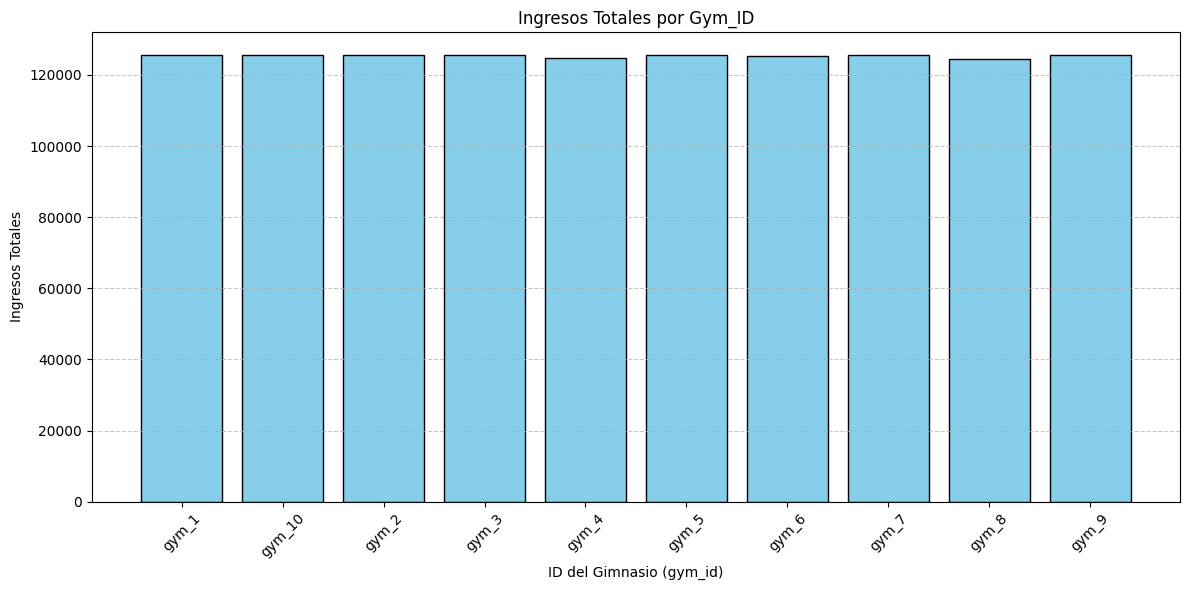

In [ ]:
# Calculamos los ingresos totales por gym_id
ingresos_por_gym = gym_df.groupby('gym_id').agg({'price_per_month': 'mean', 'user_id': pd.Series.nunique}).reset_index()

# Multiplicamos para obtener el total de ingresos
ingresos_por_gym['total_revenue'] = ingresos_por_gym['price_per_month'] * ingresos_por_gym['user_id']

# Gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(ingresos_por_gym['gym_id'], ingresos_por_gym['total_revenue'],
        color='skyblue', edgecolor='black')

# Etiquetas y título
plt.xlabel("ID del Gimnasio (gym_id)")
plt.ylabel("Ingresos Totales")
plt.title("Ingresos Totales por Gym_ID")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostramos gráfico
plt.tight_layout()
plt.show()

El gráfico muestra que los ingresos totales de cada gimnasio son muy similares, lo cual se traduce en un mercado altamente competitivo, donde no existe una ventaja clara entre los actores actuales. Esta homogeneidad tambien se puede deber a que los usuarios no entrenan en un gimnasio exclusivamente.

###Pregunta 6 - Distribución de usuarios por rago edad y género

<ipython-input-49-bd257a993bbb>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_data = gym_df.groupby(['age_group', 'gender'])['user_id'].nunique().reset_index()


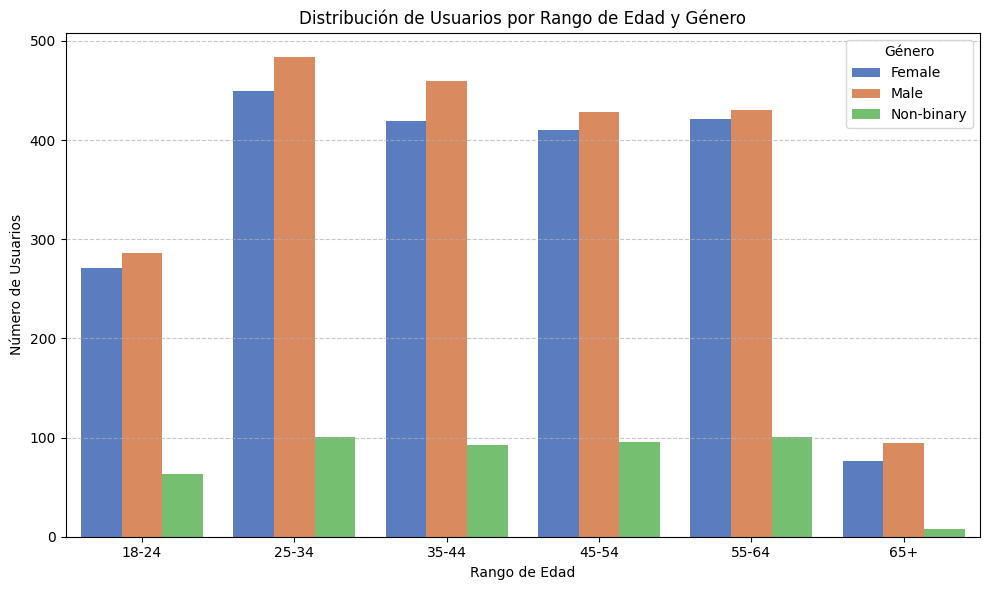

In [ ]:
# Definimos los rangos de edad
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Creamos la nueva columna de rango de edad
gym_df['age_group'] = pd.cut(gym_df['age'], bins=bins, labels=labels, right=False)

# Agrupamos por rango de edad y género, contando el número de usuarios únicos
age_gender_data = gym_df.groupby(['age_group', 'gender'])['user_id'].nunique().reset_index()

# Renombramos la columna user_id a user_count para que sea más claro
age_gender_data.rename(columns={'user_id': 'user_count'}, inplace=True)

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=age_gender_data, x='age_group', y='user_count', hue='gender', palette='muted')

# Establecemos el título, etiquetas y leyenda del gráfico
plt.title('Distribución de Usuarios por Rango de Edad y Género')
plt.xlabel('Rango de Edad')
plt.ylabel('Número de Usuarios')
plt.legend(title='Género', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Se observa que los grupos de edad entre 25-34 y 35-44 concentran el mayor número de usuarios, donde los hombres representan la moda, aunque seguidos de cerca por las mujeres. En los rangos de edad más jóvenes, 18-24, la diferencia entre géneros es menos pronunciada. A medida que aumenta la edad, la proporción de cada genero se mantiene constante, pero disminuye drásticamente en todos los géneros en el rango de mayores de 65 años.

En conclusión, la franja de 25-44 años representa la mayoría de los usuarios de gimnasio, siendo los hombres quienes lideran en número de usuarios, aunque las mujeres también ocupan una gran proporción y, por último, los usuarios no binarios tienen una presencia muy pequeña.


### Pregunta 7 - Geolocalización de los users para apertura de futuras sedes

In [ ]:
# Primero buscamos y definimos de que localdiad es cada uno de nuestros users.
usuarios_df.groupby('user_location').user_id.count()

,user_id
user_location,
Atlanta,532
Austin,489
Boston,459
Denver,511
Detroit,515
Las Vegas,504
Miami,499
Orlando,491
San Francisco,511


In [ ]:
#Importamos las librerías necesarias
import folium
from geopy.geocoders import Nominatim

# Datos de los usuarios
data = {
    "location": [
        "Atlanta", "Austin", "Boston", "Denver", "Detroit",
        "Las Vegas", "Miami", "Orlando", "San Francisco", "Seattle"
    ],
    "user_amount": [532, 489, 459, 511, 515, 504, 499, 491, 511, 489]
}
df = pd.DataFrame(data)

# Datos de los gimnasios
gyms = {
    "city": [
        "Chicago", "Dallas", "Houston", "Los Angeles", "New York",
        "Philadelphia", "Phoenix", "San Antonio", "San Diego", "San Jose"
    ],
    "gym": ["gym_3", "gym_9", "gym_4", "gym_2", "gym_1", "gym_6", "gym_5", "gym_7", "gym_8", "gym_10"]
}
gyms_df = pd.DataFrame(gyms)

# Inicializamos el localizador
geolocator = Nominatim(user_agent="geoapi")

# Obtenemos la latitud y longitud mediante una función
def geocode(location):
    try:
        geo = geolocator.geocode(location)
        return geo.latitude, geo.longitude
    except:
        return None, None

# Aplicamos tanto la latitud como longitud a al data set de usuarios y gimnasios
df[['latitude', 'longitude']] = df['location'].apply(lambda x: pd.Series(geocode(x)))
gyms_df[['latitude', 'longitude']] = gyms_df['city'].apply(lambda x: pd.Series(geocode(x)))

# Eliminamos las localizaciones que no se pudo realizar la geolocalizacion
df = df.dropna(subset=['latitude', 'longitude'])
gyms_df = gyms_df.dropna(subset=['latitude', 'longitude'])

# Usamos el módulo folium map
user_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)  # Centered on the US

# Añadimos marcadores para el data set de usuarios
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['user_amount'] ** 0.5 / 2,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        tooltip=f"{row['location']}: {row['user_amount']} users"
    ).add_to(user_map)

# Añadimos marcadores para el data set de gimnasios
for _, row in gyms_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        icon=folium.Icon(color='red', icon='dumbbell', prefix='fa'),
        tooltip=f"{row['city']}: {row['gym']}"
    ).add_to(user_map)

# Mostramos el mapa
user_map.save("user_and_gym_map.html")
user_map

### Pregunta 7 - Herramienta de eleccion de horario y dia

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact
import numpy as np

# Derivar día de la semana de 'checkin_time' y convertir horas a formato numérico
gym_df['day_of_week'] = pd.to_datetime(gym_df['checkin_time']).dt.day_name()
gym_df['checkin_hour'] = pd.to_datetime(gym_df['checkin_time']).dt.hour
gym_df['checkout_hour'] = pd.to_datetime(gym_df['checkout_time']).dt.hour

# Agrupar por 'location', 'day_of_week', 'checkin_hour', y 'workout_type' para contar usuarios
best_hours_df = gym_df.groupby(['location', 'day_of_week', 'checkin_hour', 'workout_type']).size().reset_index(name='user_count')

# Obtener el mejor horario (máximo de usuarios) para cada ubicación, día y tipo de deporte
best_hours = best_hours_df.loc[best_hours_df.groupby(['location', 'day_of_week', 'workout_type'])['user_count'].idxmax()]

# Función para graficar el mejor horario basado en ubicación, día y tipo de deporte, con colores dinámicos y explicaciones
def plot_best_hours(location, day_of_week, workout_type):
    filtered_df = best_hours_df[
        (best_hours_df['location'] == location) &
        (best_hours_df['day_of_week'] == day_of_week) &
        (best_hours_df['workout_type'] == workout_type)
    ]

    if filtered_df.empty:
        print(f"No data available for Location {location}, Day {day_of_week}, and Workout Type {workout_type}")
        return

    # Calcular la media de la columna user_count
    mean_count = filtered_df['user_count'].mean()

    # Crear colores dinámicos
    colors = ['green' if count < mean_count else 'red' for count in filtered_df['user_count']]

    # Crear gráfico
    plt.figure(figsize=(10, 5))
    bars = plt.bar(filtered_df['checkin_hour'], filtered_df['user_count'], color=colors, edgecolor='black')
    plt.axhline(mean_count, color='blue', linestyle='--', label=f'Mean = {mean_count:.2f}')

    # Añadir leyenda explicativa
    green_patch = plt.Line2D([0], [0], color='green', lw=4, label='Less crowded')
    red_patch = plt.Line2D([0], [0], color='red', lw=4, label='Crowded')

    plt.xlabel('Check-in Hour')
    plt.ylabel('Number of Users')
    plt.title(f'Best Check-in Hours for Location {location}, Day {day_of_week}, Workout Type {workout_type}')
    plt.xticks(np.arange(5, 23, step=1))  # Mostrar todas las horas
    plt.grid(axis='y')
    plt.legend(handles=[green_patch, red_patch], loc='upper left')
    plt.show()

# Crear widgets para Location, Day y Workout Type
location_widget = widgets.Dropdown(
    options=best_hours_df['location'].unique().tolist(),
    description='Location'
)

day_widget = widgets.Dropdown(
    options=best_hours_df['day_of_week'].unique().tolist(),
    description='Day'
)

workout_widget = widgets.Dropdown(
    options=best_hours_df['workout_type'].unique().tolist(),
    description='Workout Type'
)

# Interacción
interact(plot_best_hours, location=location_widget, day_of_week=day_widget, workout_type=workout_widget)

interactive(children=(Dropdown(description='Location', options=('Chicago', 'Dallas', 'Houston', 'Los Angeles',…

<function __main__.plot_best_hours(location, day_of_week, workout_type)>

El gráfico muestra las mejores horas de check-in en un gimnasio, indicando los momentos con mayor y menor cantidad de usuarios a lo largo del día. Las barras verdes representan las horas menos concurridas, mientras que las barras rojas indican las horas más concurridas, con una línea azul como referencia para el umbral de usuarios. En la parte superior, se observan filtros que permiten ajustar los parámetros del análisis, como la ubicación del gimnasio, el día de la semana y el tipo de entrenamiento. Esta información facilita identificar los horarios óptimos para evitar aglomeraciones y mejorar la experiencia del usuario en el gimnasio.